# Kilonova Model Generator

This notebook demonstrates a small module called `kilonova`, which contains software to generate model kilonovae using the simulations from Kasen (2017). The model data are available here:

https://github.com/dnkasen/Kasen_Kilonova_Models_2017

Some of the model data have been converted to gzipped-ASCII format and are available in the `data` subfolder.

As of this writing, only one kilonova has been observed (in connection to GW170817). No existing single kilonova simulation fits the measured spectrum; some combination of "red" and "blue" models with a mixture of low and high lanthanide fraction is required.

The `kilonova` module contains two classes for users:
1. `K17Generator`: take two K17 simulations and create a model out of their linear combination.
2. `K17Model`: store the combined model of two simulations.

A utility class `K17Sim` in the module is used to access the simulations on disk, but is not otherwise very useful.

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from cycler import cycler
from astropy import units as u
from kilonova import K17Generator, K17Model

mpl.rc('font', size=16)

## Plotting Code

Take a `K17Model` and output fluxes using a selection of observation times.

In [3]:
def plot_generated_model(mod):
    fig, ax = plt.subplots(1,1, figsize=(8,6))

    times = np.arange(-1, 11, 1)*u.day
    n = len(times)
    colormap = mpl.cm.plasma_r(np.linspace(0.1, 1, n+1))
    hexcolor = map(lambda rgb:'#%02x%02x%02x' % (int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255)), tuple(colormap[:,0:-1]))
    colorcycle = cycler(color=hexcolor)
    ax.set_prop_cycle(colorcycle)

    wl = mod.wave

    for d in times:
        t, fl = mod.get_flux(d)
        ax.plot(wl, fl, label='{}'.format(t))

    ax.set(xlabel=r'wavelength [$\AA$]',
           xlim=(wl[0].value, wl[-1].value),
           ylabel='flux')
    
    ax.text(0.5, 0.75, 'Model 1: $a={:.2f}$\n- $M_\mathrm{{ej}}={}M_\odot$\n- $v_\mathrm{{ej}}={}c$\n- $X_\mathrm{{lan}}={:g}$'.format(
                mod.a, mod.m_ej[0], mod.v_ej[0], mod.xlan[0]),
            fontsize=12,
            transform=ax.transAxes)
    
    ax.text(0.5, 0.5, 'Model 2: $b={:.2f}$\n- $M_\mathrm{{ej}}={}M_\odot$\n- $v_\mathrm{{ej}}={}c$\n- $X_\mathrm{{lan}}={:g}$'.format(
                mod.b, mod.m_ej[1], mod.v_ej[1], mod.xlan[1]),
            fontsize=12,
            transform=ax.transAxes)

    ax.legend(fontsize=10)

    fig.tight_layout()
    return fig

## Model Generation

Create a model generator using the data files in the `data` subfolder. Pass the folder name to the `K17Generator` constructor using the `prefix` option.

In [4]:
k17gen = K17Generator(prefix='data')
m1 = k17gen.generate_model()
m2 = k17gen.generate_model()
m3 = k17gen.generate_model()
m4 = k17gen.generate_model()

### Plot Model 1

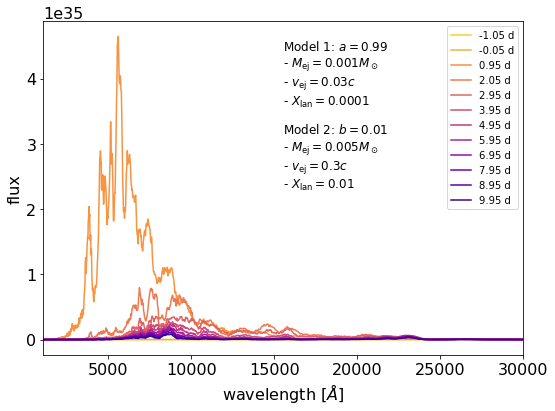

In [5]:
fig = plot_generated_model(m1)

### Plot Model 2

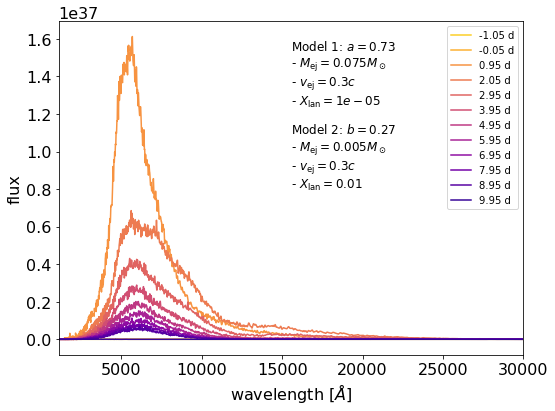

In [6]:
fig = plot_generated_model(m2)

### Plot Model 3

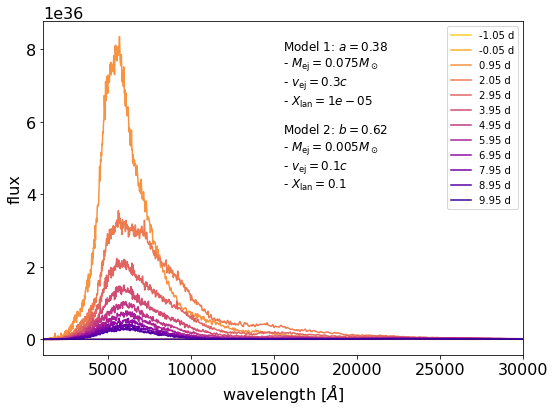

In [7]:
fig = plot_generated_model(m3)

### Plot Model 4

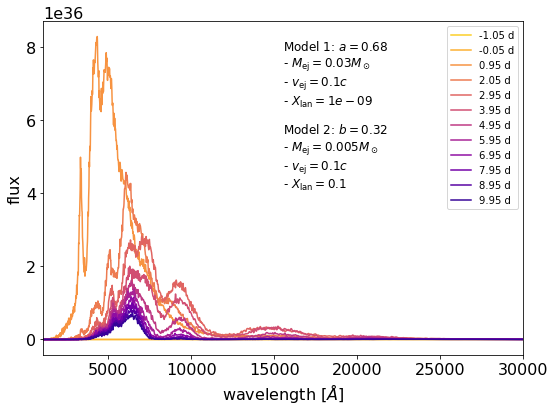

In [8]:
fig = plot_generated_model(m4)